In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [5]:
X = dataset[:,0:10]
Y = dataset[:,10]


In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [11]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.6869 - accuracy: 0.6018 - val_loss: 0.6856 - val_accuracy: 0.5616
Epoch 2/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.6755 - accuracy: 0.6458 - val_loss: 0.6803 - val_accuracy: 0.6256
Epoch 3/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.6674 - accuracy: 0.6908 - val_loss: 0.6753 - val_accuracy: 0.6301
Epoch 4/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.6601 - accuracy: 0.6908 - val_loss: 0.6700 - val_accuracy: 0.6347
Epoch 5/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.6531 - accuracy: 0.6957 - val_loss: 0.6642 - val_accuracy: 0.6393
Epoch 6/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.6460 - accuracy: 0.7123 - val_loss: 0.6581 - val_accuracy: 0.6484
Epoch 7/100
1022/1022 [==============================] - 0s 50us/step - loss

In [22]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 46us/step


0.8858447670936584

In [15]:
import matplotlib.pyplot as plt

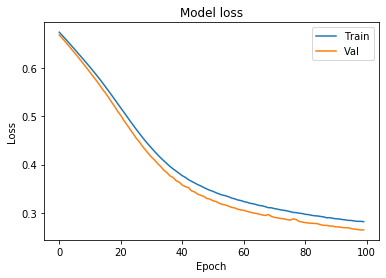

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

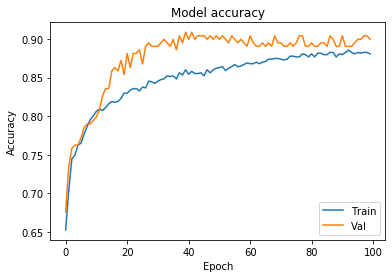

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5064 - accuracy: 0.7446 - val_loss: 0.3341 - val_accuracy: 0.8630
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3627 - accuracy: 0.8454 - val_loss: 0.3216 - val_accuracy: 0.8904
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3452 - accuracy: 0.8659 - val_loss: 0.2758 - val_accuracy: 0.8676
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3184 - accuracy: 0.8708 - val_loss: 0.2712 - val_accuracy: 0.8767
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2753 - accuracy: 0.8796 - val_loss: 0.3503 - val_accuracy: 0.8630
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3288 - accuracy: 0.8523 - val_loss: 0.2637 - val_accuracy: 0.8767
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2600

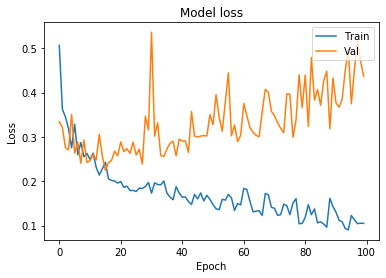

In [19]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

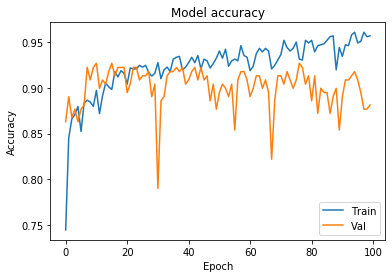

In [21]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [22]:
from keras.layers import Dropout
from keras import regularizers

In [23]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [25]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 14.7416 - accuracy: 0.6125 - val_loss: 4.1327 - val_accuracy: 0.5616
Epoch 2/100
1022/1022 [==============================] - 4s 4ms/step - loss: 1.7490 - accuracy: 0.8092 - val_loss: 0.6766 - val_accuracy: 0.8539
Epoch 3/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.5900 - accuracy: 0.8346 - val_loss: 0.4850 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4985 - accuracy: 0.8650 - val_loss: 0.4611 - val_accuracy: 0.9041
Epoch 5/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.5155 - accuracy: 0.8513 - val_loss: 0.6382 - val_accuracy: 0.7854
Epoch 6/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.5276 - accuracy: 0.8395 - val_loss: 0.4481 - val_accuracy: 0.9041
Epoch 7/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.465

Epoch 57/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4508 - accuracy: 0.8650 - val_loss: 0.4158 - val_accuracy: 0.9269
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4527 - accuracy: 0.8708 - val_loss: 0.4534 - val_accuracy: 0.8630
Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4451 - accuracy: 0.8787 - val_loss: 0.4022 - val_accuracy: 0.9315
Epoch 60/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4329 - accuracy: 0.8748 - val_loss: 0.4382 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4353 - accuracy: 0.8845 - val_loss: 0.4243 - val_accuracy: 0.8950
Epoch 62/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4292 - accuracy: 0.8816 - val_loss: 0.4916 - val_accuracy: 0.8311
Epoch 63/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4490 - accuracy: 0.8718 - val_loss: 0.4237 -

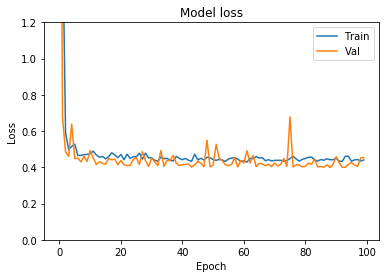

In [26]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

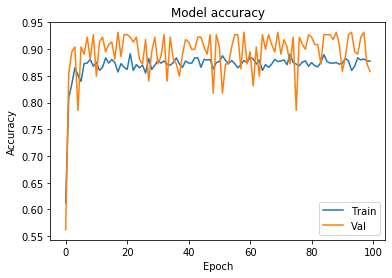

In [28]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()